## Import Datasets

In [3]:
import pandas as pd

train_data = pd.read_csv('C:/Users/ankch/Downloads/application_train.csv')

train_data_head = train_data.head()
train_data_description = train_data.describe()
train_data_info = train_data.info()

(train_data_head, train_data_description, train_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


(   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
 0      100002       1         Cash loans           M            N   
 1      100003       0         Cash loans           F            N   
 2      100004       0    Revolving loans           M            Y   
 3      100006       0         Cash loans           F            N   
 4      100007       0         Cash loans           M            N   
 
   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
 0               Y             0          202500.0    406597.5      24700.5   
 1               N             0          270000.0   1293502.5      35698.5   
 2               Y             0           67500.0    135000.0       6750.0   
 3               Y             0          135000.0    312682.5      29686.5   
 4               Y             0          121500.0    513000.0      21865.5   
 
    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
 0  ...               

In [4]:
train_data.shape

(307511, 122)

In [5]:
test_data = pd.read_csv('C:/Users/ankch/Downloads/application_test.csv')

test_data_head = test_data.head()
test_data_description = test_data.describe()
test_data_info = test_data.info()

(test_data_head, train_data_description, train_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


(   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
 0      100001         Cash loans           F            N               Y   
 1      100005         Cash loans           M            N               Y   
 2      100013         Cash loans           M            Y               Y   
 3      100028         Cash loans           F            N               Y   
 4      100038         Cash loans           M            Y               N   
 
    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
 0             0          135000.0    568800.0      20560.5         450000.0   
 1             0           99000.0    222768.0      17370.0         180000.0   
 2             0          202500.0    663264.0      69777.0         630000.0   
 3             2          315000.0   1575000.0      49018.5        1575000.0   
 4             1          180000.0    625500.0      32067.0         625500.0   
 
    ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_D

In [6]:
test_data.shape

(48744, 121)

In [7]:
cols_to_drop = [col for col in train_data.columns if col not in test_data.columns and col != 'TARGET']

train_data_adjusted = train_data.drop(columns=cols_to_drop)

train_data_copy = train_data_adjusted.copy()

In [8]:
train_data_copy.shape

(307511, 122)

In [9]:
train_data_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_data_copy.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## Datapreparation

In [11]:
import pandas as pd

missing_values = train_data_copy.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print(missing_values)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64


## Visualization (Data Preparation)

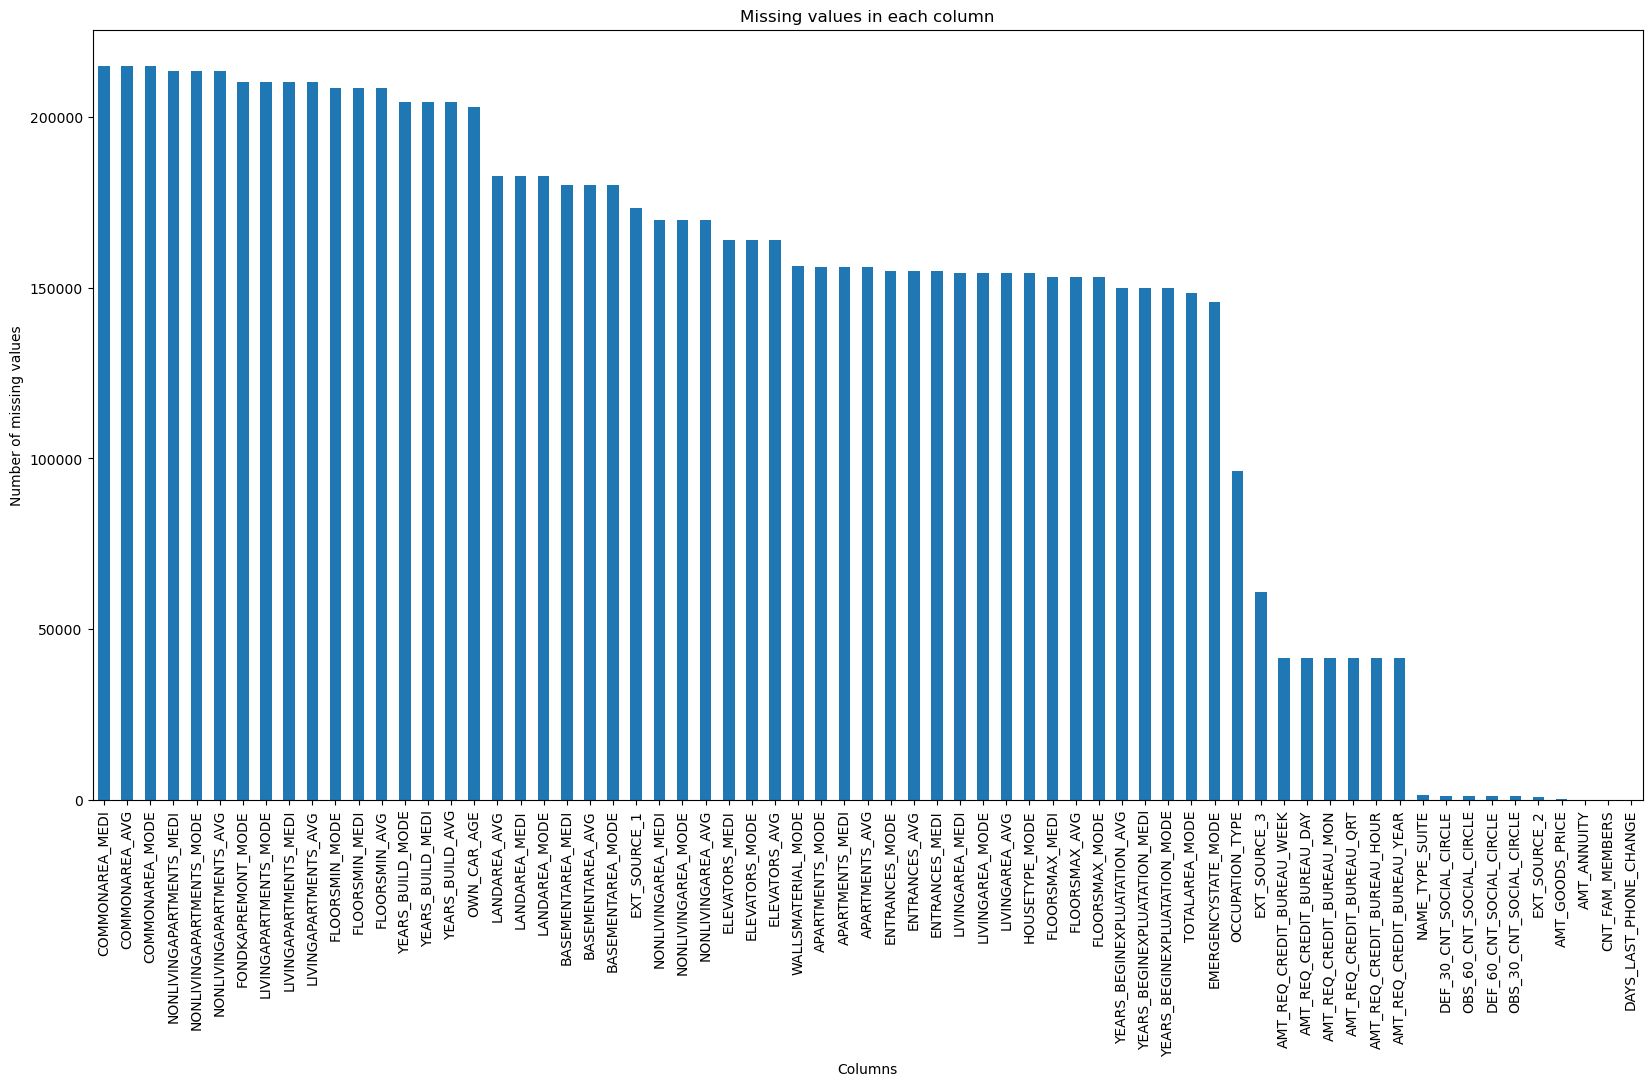

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values.plot(kind='bar')
plt.title('Missing values in each column')
plt.xticks(rotation=90)  
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.show()

## Dropping column which has more than 50% missing rows on train dataset

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

missing_percentage = train_data_copy.isnull().mean() * 100

cols_to_drop = missing_percentage[missing_percentage > 50].index

train_data_copy = train_data_copy.drop(columns=cols_to_drop)

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

numerical_cols = train_data_copy.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data_copy.select_dtypes(include=['object']).columns

train_data_copy[numerical_cols] = num_imputer.fit_transform(train_data_copy[numerical_cols])

train_data_copy[categorical_cols] = cat_imputer.fit_transform(train_data_copy[categorical_cols])

missing_values_after_imputation = train_data_copy.isnull().sum().sum()

print(f'Missing values after imputation and dropping columns: {missing_values_after_imputation}')

Missing values after imputation and dropping columns: 0


In [14]:
train_data_copy.shape

(307511, 81)

In [15]:
train_data_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preparation for test dataset

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_cols = train_data_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data_copy.select_dtypes(include=['object']).columns.tolist()

numerical_cols.remove('TARGET')
numerical_cols.remove('SK_ID_CURR')

numerical_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

train_data_prepared = full_pipeline.fit_transform(train_data_copy)

## Dropping columns which has more than 50% NaN values in Test dataset.

In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer

test_data = pd.read_csv('C:/Users/ankch/Downloads/application_test.csv')

test_data_copy = test_data.copy()

missing_percentage_test = test_data_copy.isnull().mean() * 100

cols_to_drop_test = missing_percentage_test[missing_percentage_test > 50].index

test_data_copy.drop(columns=cols_to_drop_test, inplace=True)

numerical_cols = test_data_copy.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = test_data_copy.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

test_data_copy[numerical_cols] = num_imputer.fit_transform(test_data_copy[numerical_cols])

test_data_copy[categorical_cols] = cat_imputer.fit_transform(test_data_copy[categorical_cols])

missing_values_after_imputation_test = test_data_copy.isnull().sum().sum()

print(f'Missing values after imputation and dropping columns in test data: {missing_values_after_imputation_test}')

Missing values after imputation and dropping columns in test data: 0


In [23]:
cols_to_drop = [col for col in train_data_copy.columns if col not in test_data_copy.columns and col != 'TARGET']

train_data_copy.drop(columns=cols_to_drop, inplace=True)

print("Remaining columns in train_data_copy:", train_data_copy.columns)
print("Columns in test_data_copy:", test_data_copy.columns)

Remaining columns in train_data_copy: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
      

## Lable Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = [col for col in train_data_copy.columns if train_data_copy[col].dtype == 'object']

for col in categorical_cols:
    combined_unique = pd.concat([train_data_copy[col].fillna('missing'), test_data_copy[col].fillna('missing')]).unique()
    
    label_encoder.fit(combined_unique)
    
    train_data_copy[col] = label_encoder.transform(train_data_copy[col].fillna('missing'))
    test_data_copy[col] = label_encoder.transform(test_data_copy[col].fillna('missing'))

print("Label encoding applied to:", categorical_cols)

Label encoding applied to: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


## One-hot encoding

In [25]:
train_data_copy = pd.get_dummies(train_data_copy)
test_data_copy = pd.get_dummies(test_data_copy)

print('Training Features shape: ', train_data_copy.shape)
print('Testing Features shape: ', test_data_copy.shape)

Training Features shape:  (307511, 81)
Testing Features shape:  (48744, 100)


## Downsampling Data

In [26]:
import numpy as np

majority_class = train_data_copy[train_data_copy['TARGET'] == 0]
minority_class = train_data_copy[train_data_copy['TARGET'] == 1]

majority_downsampled = majority_class.sample(n=len(minority_class), random_state=42)

downsampled = pd.concat([majority_downsampled, minority_class])

downsampled = downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

X_resampled = downsampled.drop('TARGET', axis=1)
y_resampled = downsampled['TARGET']

print('Resampled dataset shape:', downsampled.shape)

Resampled dataset shape: (49650, 81)


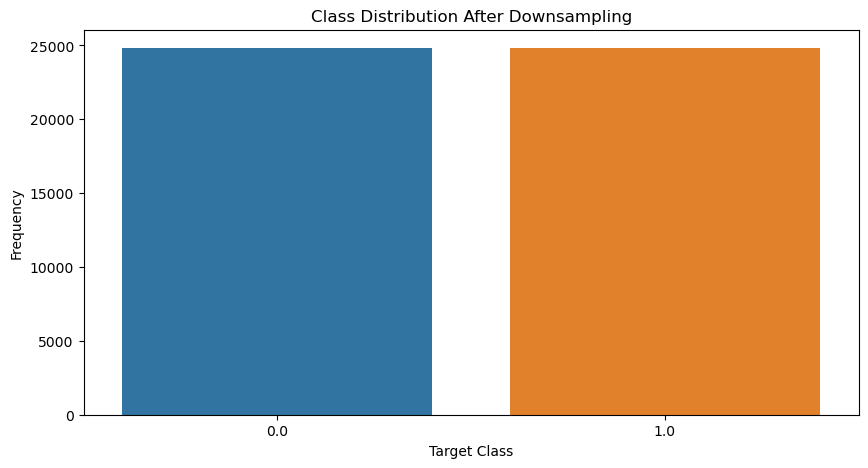

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(x='TARGET', data=downsampled)
plt.title('Class Distribution After Downsampling')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.show()

In [61]:
downsampled["TARGET"].value_count

TARGET
0.0    24825
1.0    24825
Name: count, dtype: int64

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear is good for small datasets and binary classification

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.5798590130916415
ROC-AUC Score: 0.6080375501335656


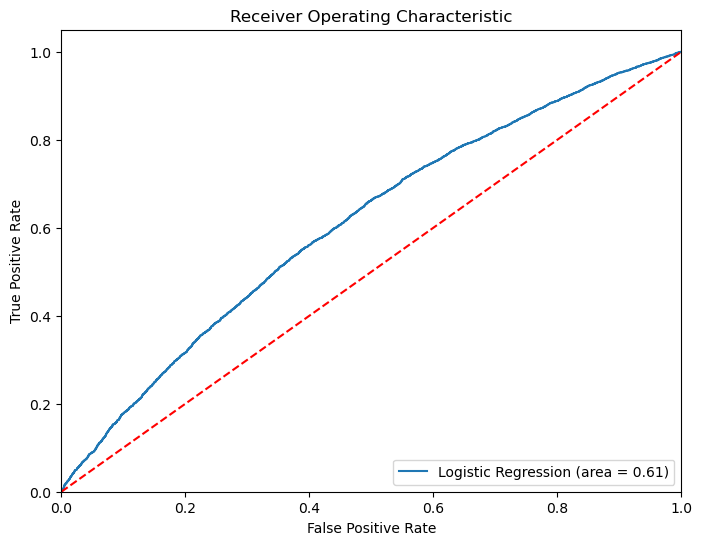

In [60]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.5832158442430345
ROC-AUC Score: 0.5832234048253564


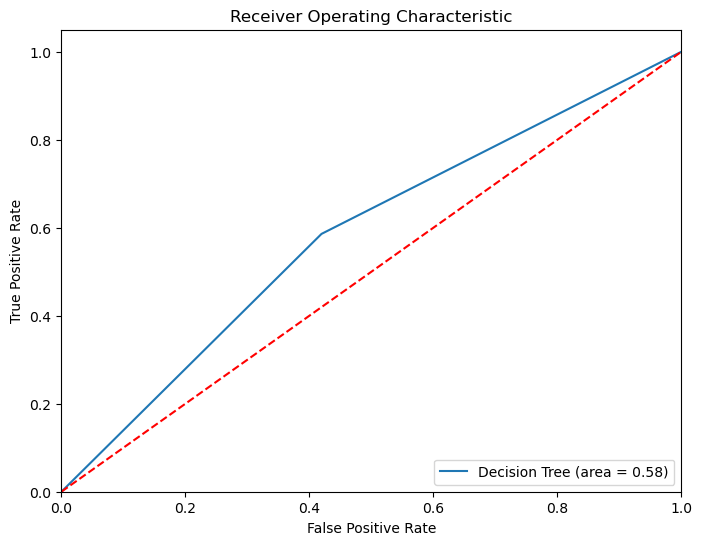

In [62]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Visualizing Confusion Matrix

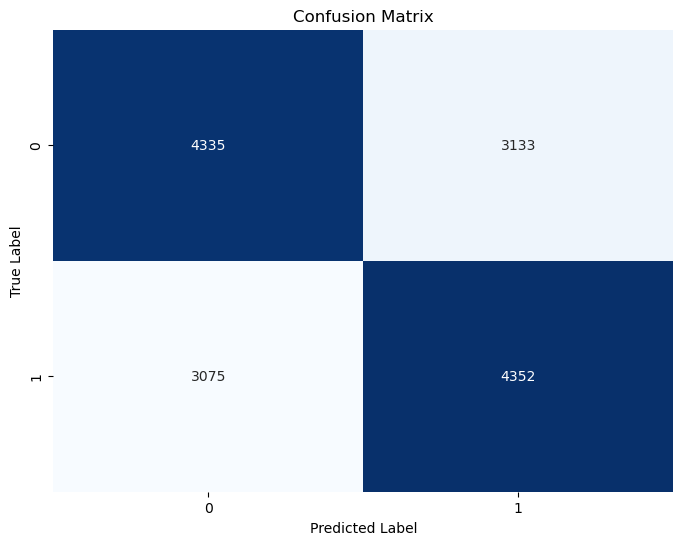

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Model

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = train_data_copy.drop('TARGET', axis=1)
y = train_data_copy['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
# Correct usage of the predict method
y_pred = rf_classifier.predict(X_test)  # Predictions are made based on the features of the test set

# Now it's fine to use predict_proba with X_test to get the predicted probabilities
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
  # Get probabilities for the positive class

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9196566002558154
ROC-AUC Score: 0.7086754546815899


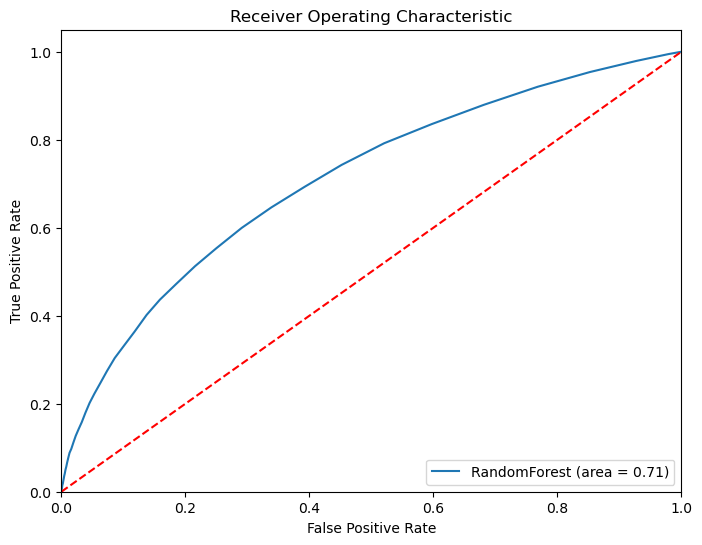

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
import pandas as pd

feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head())  


                   importance
EXT_SOURCE_2         0.066753
EXT_SOURCE_3         0.060822
DAYS_BIRTH           0.045991
DAYS_ID_PUBLISH      0.045852
DAYS_REGISTRATION    0.044887


## Gradiant Boosting Model

In [30]:
#GBM
from sklearn.model_selection import train_test_split

X = train_data_copy.drop('TARGET', axis=1)
y = train_data_copy['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9199709497691158
ROC-AUC Score: 0.7464042422278414


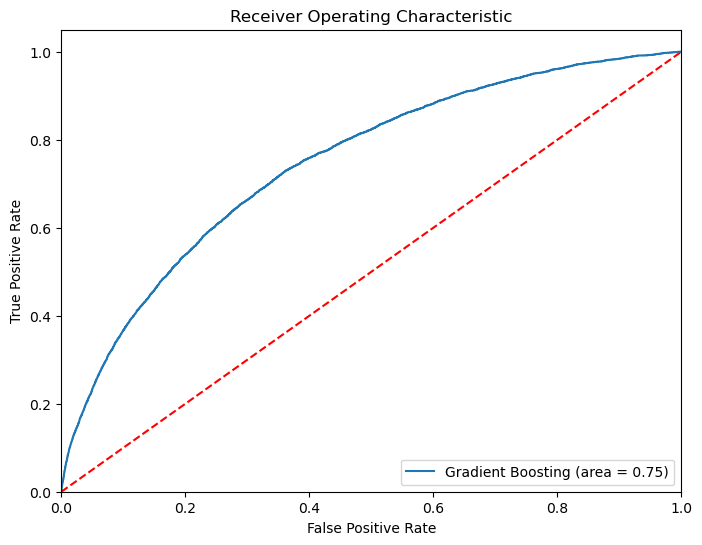

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Dashed diagonal for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
import pandas as pd

feature_importances = pd.DataFrame(gb_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head())

                 importance
EXT_SOURCE_3       0.341864
EXT_SOURCE_2       0.332106
DAYS_BIRTH         0.045986
AMT_GOODS_PRICE    0.040888
CODE_GENDER        0.040091


## Testing the GBM Model on Test dataset

In [56]:
y_pred_proba_gbm = gb_classifier.predict_proba(X_test_final)[:, 1]

In [57]:
test_data_copy.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100001.0,0,0,0,1,0.0,135000.0,568800.0,20560.5,450000.0,...,True,False,False,False,False,False,False,False,True,False
1,100005.0,0,1,0,1,0.0,99000.0,222768.0,17370.0,180000.0,...,True,False,False,False,False,False,False,True,False,False
2,100013.0,0,1,1,1,0.0,202500.0,663264.0,69777.0,630000.0,...,True,False,False,False,False,False,False,True,False,False
3,100028.0,0,0,0,1,2.0,315000.0,1575000.0,49018.5,1575000.0,...,True,False,False,False,False,False,False,True,False,False
4,100038.0,0,1,1,0,1.0,180000.0,625500.0,32067.0,625500.0,...,True,False,False,False,False,False,False,True,False,False


In [58]:
submit_gbm = X_test_final.reset_index()[['SK_ID_CURR']]
submit_gbm['TARGET'] = y_pred_proba_gbm

submit_gbm.head()

,SK_ID_CURR,TARGET
0,0,0.099952
1,0,0.155560
2,0,0.023114
3,0,0.042040
4,0,0.116664


In [72]:
submit_gbm.to_csv('HCDR_submission.csv', index = False)

In [75]:
submit_gbm.to_csv('C:/Users/ankch/Downloads/HCDR_submission.csv', index=False)